In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.neural_network import MLPClassifier
np.set_printoptions(threshold=np.nan)

In [39]:
data = pd.read_csv("../Data/preprocessed_incl_steplength.csv") 

data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})
# data

In [40]:
sidlist = data['SubjectID'].unique()

#Make an array out of all rows for every unique SubjectID and list them together
grouped_data = [data[data['SubjectID']==sid] for sid in sidlist]
# grouped_data[0]

In [46]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    np.random.shuffle(data)
    N = len(data)
    training = data[:int(ratio*N)]
    validation = data[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data):
    return pd.DataFrame(np.vstack(data), columns=['TestID', 'Conditie', 'SubjectID','SegmentNr','WalkingDirection',        
 'SegmentData', 'Height', 'Weight', 'Age', 'BMI', 'std_SegmentData', 'Som_afstand', 'AverageStepLength'])

training,validation = validation_split(grouped_data, 0.7)
training = flatten(training)
validation = flatten(validation)
# training

In [64]:
training_matrix = training.as_matrix()
X_train = np.array(training_matrix[:,[11, 12, 7]], dtype=float)
y_train = np.array(training_matrix[:, 1], dtype=int)

validation_matrix = validation.as_matrix()
X_test = np.array(validation_matrix[:,[11, 12, 7]], dtype=float)
y_test = np.array(validation_matrix[:, 1], dtype=int)

In [65]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=39)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 69.64 %.


Text(0,0.5,'Mean Error')

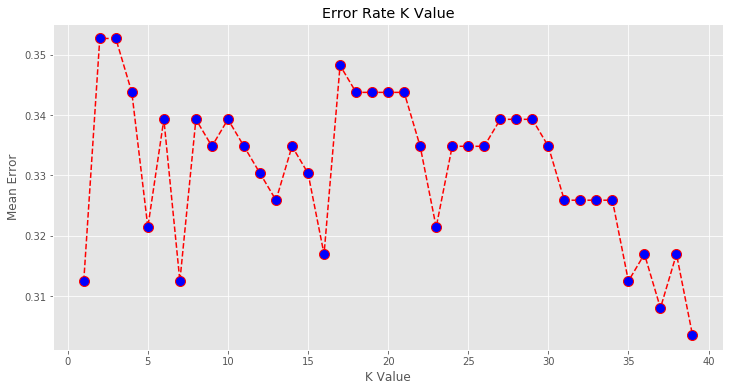

In [66]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

Confusion matrix, without normalization
[[93 19]
 [49 63]]
Normalized confusion matrix
[[0.83 0.17]
 [0.44 0.56]]
Accuracy of our model is equal 69.64 %.


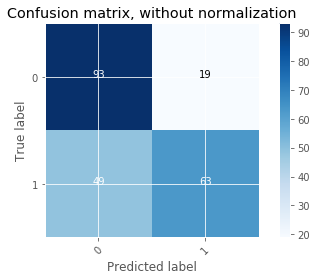

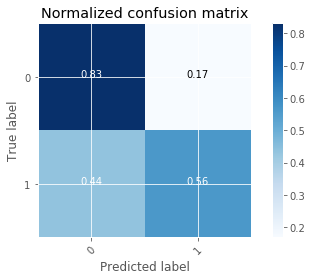

In [67]:
#Plot confusion matrix
class_names = ['0', '1']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
plt.show()

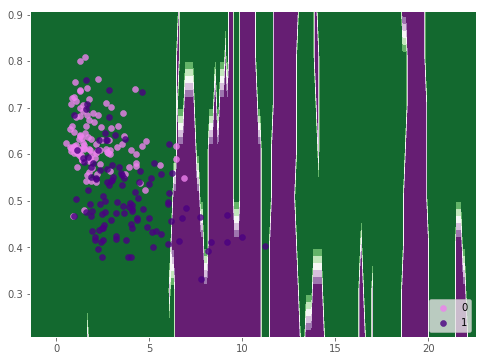

In [74]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label='{}'.format(label))

plt.legend(loc='lower right')
plt.show()

Zelfde code, alleen met PCA, hierdoor ziet de plot er een stuk beter uit

In [69]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
x_train = pca_model.transform(X_train)
x_test = pca_model.transform(X_test)

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=39)
knn_model.fit(x_train, y_train) 
y_predict = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 69.64 %.


Text(0,0.5,'Mean Error')

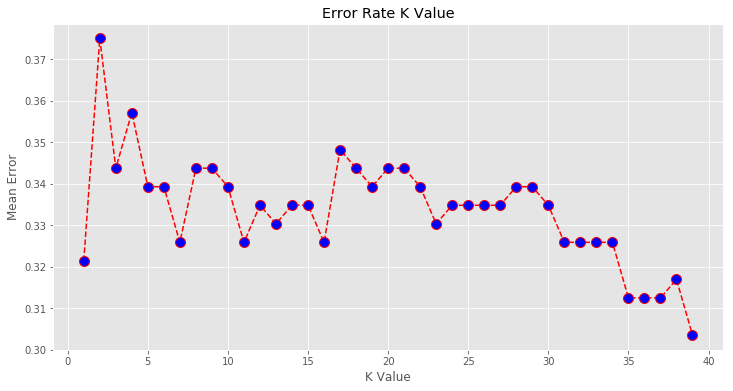

In [71]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

Confusion matrix, without normalization
[[93 19]
 [49 63]]
Normalized confusion matrix
[[0.83 0.17]
 [0.44 0.56]]
Accuracy of our model is equal 69.64 %.


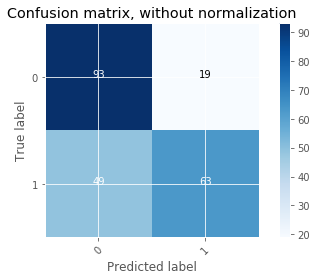

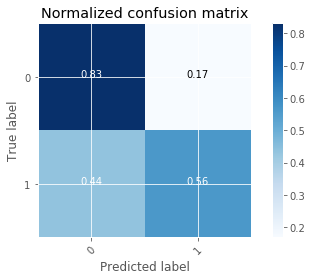

In [75]:
#Plot confusion matrix
class_names = ['0', '1']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
accuracy = accuracy_score(y_test, y_predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
plt.show()

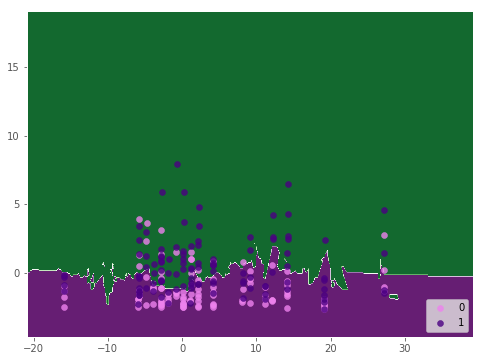

In [76]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen'}
x_min, x_max = x_train[:, 0].min(), x_train[:, 0].max()
y_min, y_max = x_train[:, 1].min(), x_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(x_test[indices, 0], x_test[indices, 1], c=colors[label], alpha=0.8, 
                label='{}'.format(label))

plt.legend(loc='lower right')
plt.show()